In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
train_csv = pd.read_csv("./sales_train.csv")
test_csv = pd.read_csv("./test.csv")
print(train_csv.head(5), "\n")
print(test_csv.head(5))

         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0 

   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268


In [14]:
print(train_csv.info(), "\n")
print(test_csv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB
None


In [11]:
print(train_csv.shape, test_csv.shape)

(2935849, 6) (214200, 3)


In [15]:
items_csv = pd.read_csv("./items.csv")
item_categories_csv = pd.read_csv("./item_categories.csv")
print(items_csv.head(5), "\n")
print(item_categories_csv.head(5))

                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40   

        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4


In [16]:
df_train = pd.merge(train_csv, items_csv, on="item_id")
df_train = pd.merge(df_train, item_categories_csv, on="item_category_id")

df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,23.01.2013,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,20.01.2013,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,02.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,03.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [66]:
# let's see how the items vary by date
# first, let's group by date with pandas
df_train["date"] = pd.to_datetime(df_train["date"])
df_date = pd.DataFrame(df_train.groupby('date', as_index=False)['item_price'].sum())
df_date.head(5)

,date,item_price
0,2013-01-01,1.211779e+06
1,2013-01-02,2.246770e+06
2,2013-01-03,2.330874e+06
3,2013-01-04,1.655931e+06
4,2013-01-05,2.478968e+06


In [69]:
df_date["monthly"]= df_date["date"].apply(lambda date: date.replace(day=1))
df_date = pd.DataFrame(df_date.groupby('monthly', as_index=False)['item_price'].sum())
df_date.head(5)

,monthly,item_price
0,2013-01-01,7.060131e+07
1,2013-02-01,7.827604e+07
2,2013-03-01,8.109691e+07
3,2013-04-01,6.406593e+07
4,2013-05-01,6.355117e+07


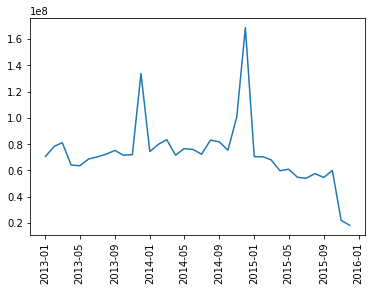

In [70]:
plt.plot( "monthly", "item_price", data = df_date.sort_values(by="monthly"))

plt.xticks(rotation=90)

plt.show()